In [2]:
import os
import numpy as np
import pandas as pd
import seaborn
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import csv
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

In [58]:
root = "/media/visiopharm5/WDGold/deeplearning/MIL/CLAM/eval_results_349_tumor_masked"
target = "EVAL_mondor_hcc_tumor-masked_139_T-cell_Exhaustion_cv_highvsrest_00X_CLAM_50_s1_cv"
best_fold = 7
path = os.path.join(root, target)
# file = os.path.join(path, "fold_"+str(fold)+".csv")
# print(file)

### Optimal cutoff calculate on the test data themselves

In [59]:
# with open(os.path.join(path, 'cutoffs.csv'), newline='') as csvfile:
#     spamreader = csv.reader(csvfile, delimiter=',')
#     for row in spamreader:
#         cutoffs = row
# print(cutoffs)

### Optimal cutoff calculate on the tcga test set: for mondor dataset

In [60]:
# mondor 258
# with open(os.path.join(path.replace("mondor", "tcga").replace("258", "349").replace("00X", "622"), 'cutoffs.csv'), newline='') as csvfile:
# mondor 139
with open(os.path.join(path.replace("mondor", "tcga").replace("139", "349").replace("00X", "622"), 'cutoffs.csv'), newline='') as csvfile:
# colorectal
# with open(os.path.join(path.replace("colorectal", "hcc_tumor").replace("_1_", "_349_").replace("00X", "highvsrest_622"), 'cutoffs.csv'), newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        cutoffs = row
print(cutoffs)

['0.07102207094430922', '0.19939488172531128', '0.14111670851707458', '0.00038018528721295297', '0.2421836853027344', '0.07392417639493942', '0.2803180515766144', '0.1867944598197937', '0.1167030930519104', '0.08301781117916107']


###  "fold_X_optimal_tcga.csv" for one fold: 
#### Ouput: predictions with probability,  case IDs, consistent prediction, true prediction
#### Followed by the script "concordance_check_mondor (consistence summary)"

In [61]:
# fold = 8

# df = pd.read_csv(os.path.join(path, "fold_"+str(fold)+".csv"))
# print(df.shape)
# display(df.head(5))

# # use optimal theshold ***************************************************
# print('cutoff: ' + cutoffs[fold])
# #     if df['p_1'] > cutoffs[fold]:
# #         df['Y_hat'] = 1.0
# #     else:
# #         df['Y_hat'] = 0.0
# df.loc[df['p_1'] >= float(cutoffs[fold]), 'Y_hat'] = 1.0
# df.loc[df['p_1'] < float(cutoffs[fold]), 'Y_hat'] = 0.0

# df['case_id'] = ''
# for i in range(df.shape[0]):
#     # col 'case_id'
#     df.iloc[i, 5] = df.iloc[i, 0][:8]

# df['consistent_prediction'] = ''
# df['true_prediction'] = ''
# for i in range(df.shape[0]):    
#     # col 'consistent_prediction'
#     if df[df['case_id'] == df.iloc[i, 5]].shape[0] == 1:
#         df.iloc[i, 6] = None
#     else:
#         if len(set(df[df['case_id'] == df.iloc[i, 5]]['Y_hat'].to_list())) == 1:
#             df.iloc[i, 6] = True
#         else:
#             df.iloc[i, 6] = False

#     # col 'true_prediction'
#     if df.iloc[i, 1] == df.iloc[i, 2]:
#         df.iloc[i, 7] = True
#     else:
#         df.iloc[i, 7] = False


# display(df.head(5))

# # Optimal cutoff calculate on the tcga test set
# df.to_csv(os.path.join(path, "fold_"+str(fold)+"_optimal_tcga.csv"), index=False)
# # *************************************************************************


### For all the folds

In [62]:
k = 0
for roots, dirs, files in os.walk(path):
    for file in files:
        if file.startswith("fold_") and len(file)== 10:
            k = k + 1
print(k) # folds

10


In [63]:
def plot_confusion_matrix(data, labels, fold, fig, fmt="d"):
    """Plot confusion matrix using heatmap.
 
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    seaborn.set(color_codes=True)
#    plt.figure(1, figsize=(9, 6))
    if fold == 9:
        ax = fig.add_subplot(4, 3, fold+3)
    else:
        ax = fig.add_subplot(4, 3, fold+1)
    # tcga test set
#     ax.set_title("Confusion Matrix fold " + str(fold))
    # mondor series
    ax.set_title("Confusion Matrix model " + str(fold))
 
    seaborn.set(font_scale=1.4)
    
    annot = [str(data.flatten()[i]) + "\n(" + str(round(data.flatten()[i]/data.sum()*100, 2))+"%)"  for i in range(4)]
    annot = np.reshape(annot,(2,2))
    
#     ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'slide amount'}, fmt=fmt,
    ax = seaborn.heatmap(data, annot=annot, cmap="YlGnBu", cbar_kws={'label': 'slide amount'}, fmt="",
#                          square=True)
    # normalize to sum (258)
                         square=True, vmin=0, vmax=data.sum()) 
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="Predicted label", 
           xlabel="Actual label")
    
    # if the heatmap is cut off...
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    return fig

### Output: for all fold
1. "fold_X_optimal_tcga.csv": predictions with probability,  case IDs, consistent prediction, true prediction
2. confusion matrice

(139, 5)


,slide_id,Y,Y_hat,p_0,p_1
0,HMNT0439_bis - 2017-06-18 00.05.21,1.0,0.0,0.748673,0.251327
1,HMNT0206 - 2017-08-19 07.36.08,1.0,0.0,0.553046,0.446954
2,HMNT0185_bis - 2017-06-15 14.01.13,1.0,0.0,0.678598,0.321402
3,HMNT0124_bis - 2017-06-05 05.08.39,1.0,0.0,0.724912,0.275088
4,HMNT0346_bis - 2017-06-13 17.02.45,1.0,0.0,0.540125,0.459875


cutoff: 0.07102207094430922


,slide_id,Y,Y_hat,p_0,p_1,case_id,consistent_prediction,true_prediction
0,HMNT0439_bis - 2017-06-18 00.05.21,1.0,1.0,0.748673,0.251327,HMNT0439,None,True
1,HMNT0206 - 2017-08-19 07.36.08,1.0,1.0,0.553046,0.446954,HMNT0206,None,True
2,HMNT0185_bis - 2017-06-15 14.01.13,1.0,1.0,0.678598,0.321402,HMNT0185,None,True
3,HMNT0124_bis - 2017-06-05 05.08.39,1.0,1.0,0.724912,0.275088,HMNT0124,None,True
4,HMNT0346_bis - 2017-06-13 17.02.45,1.0,1.0,0.540125,0.459875,HMNT0346,None,True


8
131
[8, 43, 0, 88]
(139, 5)


,slide_id,Y,Y_hat,p_0,p_1
0,HMNT0439_bis - 2017-06-18 00.05.21,1.0,0.0,0.770405,0.229596
1,HMNT0206 - 2017-08-19 07.36.08,1.0,0.0,0.656701,0.343299
2,HMNT0185_bis - 2017-06-15 14.01.13,1.0,0.0,0.746719,0.253281
3,HMNT0124_bis - 2017-06-05 05.08.39,1.0,0.0,0.665383,0.334617
4,HMNT0346_bis - 2017-06-13 17.02.45,1.0,0.0,0.741381,0.258619


cutoff: 0.19939488172531128


,slide_id,Y,Y_hat,p_0,p_1,case_id,consistent_prediction,true_prediction
0,HMNT0439_bis - 2017-06-18 00.05.21,1.0,1.0,0.770405,0.229596,HMNT0439,None,True
1,HMNT0206 - 2017-08-19 07.36.08,1.0,1.0,0.656701,0.343299,HMNT0206,None,True
2,HMNT0185_bis - 2017-06-15 14.01.13,1.0,1.0,0.746719,0.253281,HMNT0185,None,True
3,HMNT0124_bis - 2017-06-05 05.08.39,1.0,1.0,0.665383,0.334617,HMNT0124,None,True
4,HMNT0346_bis - 2017-06-13 17.02.45,1.0,1.0,0.741381,0.258619,HMNT0346,None,True


8
131
[7, 53, 1, 78]
(139, 5)


,slide_id,Y,Y_hat,p_0,p_1
0,HMNT0439_bis - 2017-06-18 00.05.21,1.0,0.0,0.797581,0.202419
1,HMNT0206 - 2017-08-19 07.36.08,1.0,0.0,0.696902,0.303098
2,HMNT0185_bis - 2017-06-15 14.01.13,1.0,0.0,0.765814,0.234186
3,HMNT0124_bis - 2017-06-05 05.08.39,1.0,0.0,0.689978,0.310022
4,HMNT0346_bis - 2017-06-13 17.02.45,1.0,0.0,0.795821,0.204178


cutoff: 0.14111670851707458


,slide_id,Y,Y_hat,p_0,p_1,case_id,consistent_prediction,true_prediction
0,HMNT0439_bis - 2017-06-18 00.05.21,1.0,1.0,0.797581,0.202419,HMNT0439,None,True
1,HMNT0206 - 2017-08-19 07.36.08,1.0,1.0,0.696902,0.303098,HMNT0206,None,True
2,HMNT0185_bis - 2017-06-15 14.01.13,1.0,1.0,0.765814,0.234186,HMNT0185,None,True
3,HMNT0124_bis - 2017-06-05 05.08.39,1.0,1.0,0.689978,0.310022,HMNT0124,None,True
4,HMNT0346_bis - 2017-06-13 17.02.45,1.0,1.0,0.795821,0.204178,HMNT0346,None,True


8
131
[8, 74, 0, 57]
(139, 5)


,slide_id,Y,Y_hat,p_0,p_1
0,HMNT0439_bis - 2017-06-18 00.05.21,1.0,0.0,0.974482,0.025518
1,HMNT0206 - 2017-08-19 07.36.08,1.0,0.0,0.641894,0.358106
2,HMNT0185_bis - 2017-06-15 14.01.13,1.0,1.0,0.170113,0.829887
3,HMNT0124_bis - 2017-06-05 05.08.39,1.0,0.0,0.610830,0.389170
4,HMNT0346_bis - 2017-06-13 17.02.45,1.0,0.0,0.756125,0.243875


cutoff: 0.00038018528721295297


,slide_id,Y,Y_hat,p_0,p_1,case_id,consistent_prediction,true_prediction
0,HMNT0439_bis - 2017-06-18 00.05.21,1.0,1.0,0.974482,0.025518,HMNT0439,None,True
1,HMNT0206 - 2017-08-19 07.36.08,1.0,1.0,0.641894,0.358106,HMNT0206,None,True
2,HMNT0185_bis - 2017-06-15 14.01.13,1.0,1.0,0.170113,0.829887,HMNT0185,None,True
3,HMNT0124_bis - 2017-06-05 05.08.39,1.0,1.0,0.610830,0.389170,HMNT0124,None,True
4,HMNT0346_bis - 2017-06-13 17.02.45,1.0,1.0,0.756125,0.243875,HMNT0346,None,True


8
131
[8, 81, 0, 50]
(139, 5)


,slide_id,Y,Y_hat,p_0,p_1
0,HMNT0439_bis - 2017-06-18 00.05.21,1.0,0.0,0.709946,0.290054
1,HMNT0206 - 2017-08-19 07.36.08,1.0,0.0,0.772817,0.227183
2,HMNT0185_bis - 2017-06-15 14.01.13,1.0,0.0,0.777510,0.222490
3,HMNT0124_bis - 2017-06-05 05.08.39,1.0,0.0,0.686076,0.313924
4,HMNT0346_bis - 2017-06-13 17.02.45,1.0,0.0,0.726042,0.273958


cutoff: 0.2421836853027344


,slide_id,Y,Y_hat,p_0,p_1,case_id,consistent_prediction,true_prediction
0,HMNT0439_bis - 2017-06-18 00.05.21,1.0,1.0,0.709946,0.290054,HMNT0439,None,True
1,HMNT0206 - 2017-08-19 07.36.08,1.0,0.0,0.772817,0.227183,HMNT0206,None,False
2,HMNT0185_bis - 2017-06-15 14.01.13,1.0,0.0,0.777510,0.222490,HMNT0185,None,False
3,HMNT0124_bis - 2017-06-05 05.08.39,1.0,1.0,0.686076,0.313924,HMNT0124,None,True
4,HMNT0346_bis - 2017-06-13 17.02.45,1.0,1.0,0.726042,0.273958,HMNT0346,None,True


8
131
[5, 18, 3, 113]
(139, 5)


,slide_id,Y,Y_hat,p_0,p_1
0,HMNT0439_bis - 2017-06-18 00.05.21,1.0,0.0,0.806790,0.193210
1,HMNT0206 - 2017-08-19 07.36.08,1.0,0.0,0.604104,0.395896
2,HMNT0185_bis - 2017-06-15 14.01.13,1.0,0.0,0.664344,0.335656
3,HMNT0124_bis - 2017-06-05 05.08.39,1.0,0.0,0.673756,0.326244
4,HMNT0346_bis - 2017-06-13 17.02.45,1.0,0.0,0.584350,0.415650


cutoff: 0.07392417639493942


,slide_id,Y,Y_hat,p_0,p_1,case_id,consistent_prediction,true_prediction
0,HMNT0439_bis - 2017-06-18 00.05.21,1.0,1.0,0.806790,0.193210,HMNT0439,None,True
1,HMNT0206 - 2017-08-19 07.36.08,1.0,1.0,0.604104,0.395896,HMNT0206,None,True
2,HMNT0185_bis - 2017-06-15 14.01.13,1.0,1.0,0.664344,0.335656,HMNT0185,None,True
3,HMNT0124_bis - 2017-06-05 05.08.39,1.0,1.0,0.673756,0.326244,HMNT0124,None,True
4,HMNT0346_bis - 2017-06-13 17.02.45,1.0,1.0,0.584350,0.415650,HMNT0346,None,True


8
131
[8, 70, 0, 61]
(139, 5)


,slide_id,Y,Y_hat,p_0,p_1
0,HMNT0439_bis - 2017-06-18 00.05.21,1.0,0.0,0.720064,0.279936
1,HMNT0206 - 2017-08-19 07.36.08,1.0,0.0,0.638009,0.361991
2,HMNT0185_bis - 2017-06-15 14.01.13,1.0,0.0,0.744624,0.255376
3,HMNT0124_bis - 2017-06-05 05.08.39,1.0,0.0,0.584618,0.415382
4,HMNT0346_bis - 2017-06-13 17.02.45,1.0,0.0,0.732060,0.267940


cutoff: 0.2803180515766144


,slide_id,Y,Y_hat,p_0,p_1,case_id,consistent_prediction,true_prediction
0,HMNT0439_bis - 2017-06-18 00.05.21,1.0,0.0,0.720064,0.279936,HMNT0439,None,False
1,HMNT0206 - 2017-08-19 07.36.08,1.0,1.0,0.638009,0.361991,HMNT0206,None,True
2,HMNT0185_bis - 2017-06-15 14.01.13,1.0,0.0,0.744624,0.255376,HMNT0185,None,False
3,HMNT0124_bis - 2017-06-05 05.08.39,1.0,1.0,0.584618,0.415382,HMNT0124,None,True
4,HMNT0346_bis - 2017-06-13 17.02.45,1.0,0.0,0.732060,0.267940,HMNT0346,None,False


8
131
[4, 10, 4, 121]
(139, 5)


,slide_id,Y,Y_hat,p_0,p_1
0,HMNT0439_bis - 2017-06-18 00.05.21,1.0,0.0,0.852613,0.147387
1,HMNT0206 - 2017-08-19 07.36.08,1.0,1.0,0.224795,0.775205
2,HMNT0185_bis - 2017-06-15 14.01.13,1.0,1.0,0.364886,0.635114
3,HMNT0124_bis - 2017-06-05 05.08.39,1.0,1.0,0.278467,0.721533
4,HMNT0346_bis - 2017-06-13 17.02.45,1.0,1.0,0.372318,0.627682


cutoff: 0.1867944598197937


,slide_id,Y,Y_hat,p_0,p_1,case_id,consistent_prediction,true_prediction
0,HMNT0439_bis - 2017-06-18 00.05.21,1.0,0.0,0.852613,0.147387,HMNT0439,None,False
1,HMNT0206 - 2017-08-19 07.36.08,1.0,1.0,0.224795,0.775205,HMNT0206,None,True
2,HMNT0185_bis - 2017-06-15 14.01.13,1.0,1.0,0.364886,0.635114,HMNT0185,None,True
3,HMNT0124_bis - 2017-06-05 05.08.39,1.0,1.0,0.278467,0.721533,HMNT0124,None,True
4,HMNT0346_bis - 2017-06-13 17.02.45,1.0,1.0,0.372318,0.627682,HMNT0346,None,True


8
131
[7, 34, 1, 97]
(139, 5)


,slide_id,Y,Y_hat,p_0,p_1
0,HMNT0439_bis - 2017-06-18 00.05.21,1.0,0.0,0.731349,0.268651
1,HMNT0206 - 2017-08-19 07.36.08,1.0,0.0,0.670521,0.329479
2,HMNT0185_bis - 2017-06-15 14.01.13,1.0,0.0,0.618982,0.381018
3,HMNT0124_bis - 2017-06-05 05.08.39,1.0,0.0,0.660657,0.339344
4,HMNT0346_bis - 2017-06-13 17.02.45,1.0,0.0,0.866229,0.133771


cutoff: 0.1167030930519104


,slide_id,Y,Y_hat,p_0,p_1,case_id,consistent_prediction,true_prediction
0,HMNT0439_bis - 2017-06-18 00.05.21,1.0,1.0,0.731349,0.268651,HMNT0439,None,True
1,HMNT0206 - 2017-08-19 07.36.08,1.0,1.0,0.670521,0.329479,HMNT0206,None,True
2,HMNT0185_bis - 2017-06-15 14.01.13,1.0,1.0,0.618982,0.381018,HMNT0185,None,True
3,HMNT0124_bis - 2017-06-05 05.08.39,1.0,1.0,0.660657,0.339344,HMNT0124,None,True
4,HMNT0346_bis - 2017-06-13 17.02.45,1.0,1.0,0.866229,0.133771,HMNT0346,None,True


8
131
[8, 43, 0, 88]
(139, 5)


,slide_id,Y,Y_hat,p_0,p_1
0,HMNT0439_bis - 2017-06-18 00.05.21,1.0,0.0,0.756295,0.243705
1,HMNT0206 - 2017-08-19 07.36.08,1.0,0.0,0.540354,0.459646
2,HMNT0185_bis - 2017-06-15 14.01.13,1.0,0.0,0.788463,0.211537
3,HMNT0124_bis - 2017-06-05 05.08.39,1.0,0.0,0.673819,0.326181
4,HMNT0346_bis - 2017-06-13 17.02.45,1.0,0.0,0.839687,0.160313


cutoff: 0.08301781117916107


,slide_id,Y,Y_hat,p_0,p_1,case_id,consistent_prediction,true_prediction
0,HMNT0439_bis - 2017-06-18 00.05.21,1.0,1.0,0.756295,0.243705,HMNT0439,None,True
1,HMNT0206 - 2017-08-19 07.36.08,1.0,1.0,0.540354,0.459646,HMNT0206,None,True
2,HMNT0185_bis - 2017-06-15 14.01.13,1.0,1.0,0.788463,0.211537,HMNT0185,None,True
3,HMNT0124_bis - 2017-06-05 05.08.39,1.0,1.0,0.673819,0.326181,HMNT0124,None,True
4,HMNT0346_bis - 2017-06-13 17.02.45,1.0,1.0,0.839687,0.160313,HMNT0346,None,True


8
131
[8, 54, 0, 77]


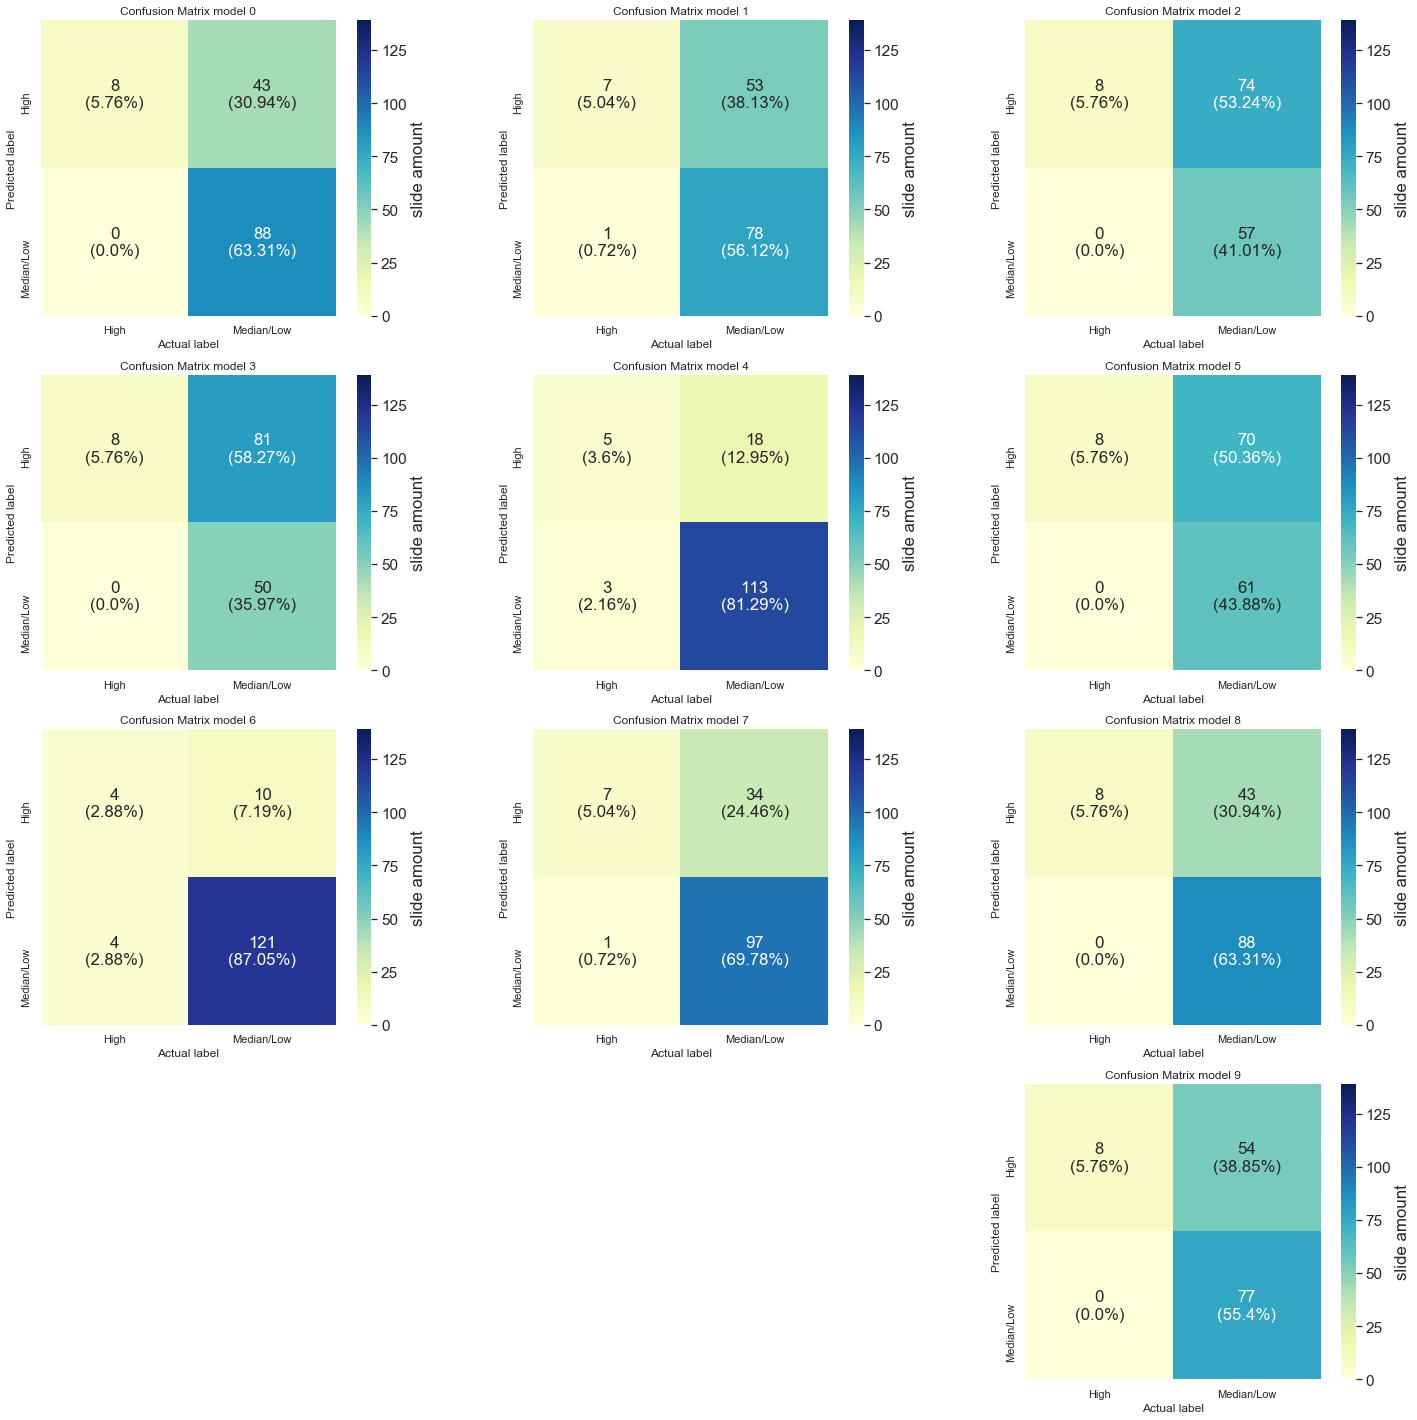

In [64]:
# define labels
labels = ["High", "Median/Low"] # Low + Median
fig = plt.figure(figsize=(25, 25))
sens = []
spes = []
dataset = []

for fold in range(k):
    df = pd.read_csv(os.path.join(path, "fold_"+str(fold)+".csv"))
    print(df.shape)
    display(df.head(5))
   
    # use optimal theshold ***************************************************
    print('cutoff: ' + cutoffs[fold])
#     if df['p_1'] > cutoffs[fold]:
#         df['Y_hat'] = 1.0
#     else:
#         df['Y_hat'] = 0.0
    df.loc[df['p_1'] >= float(cutoffs[fold]), 'Y_hat'] = 1.0
    df.loc[df['p_1'] < float(cutoffs[fold]), 'Y_hat'] = 0.0
    
    df['case_id'] = ''
    for i in range(df.shape[0]):
        # col 'case_id'
        df.iloc[i, 5] = df.iloc[i, 0][:8]
        
    df['consistent_prediction'] = ''
    df['true_prediction'] = ''
    for i in range(df.shape[0]):    
        # col 'consistent_prediction'
        if df[df['case_id'] == df.iloc[i, 5]].shape[0] == 1:
            df.iloc[i, 6] = None
        else:
            if len(set(df[df['case_id'] == df.iloc[i, 5]]['Y_hat'].to_list())) == 1:
                df.iloc[i, 6] = True
            else:
                df.iloc[i, 6] = False
        
        # col 'true_prediction'
        if df.iloc[i, 1] == df.iloc[i, 2]:
            df.iloc[i, 7] = True
        else:
            df.iloc[i, 7] = False
    

    display(df.head(5))
    
#     using optimal cutoff calculate on the tcga test set: for mondor
    df.to_csv(os.path.join(path, "fold_"+str(fold)+"_optimal_tcga.csv"), index=False)
    # using optimal cutoff calculate on the test data themselves
#     df.to_csv(os.path.join(path, "fold_"+str(fold)+"_optimal.csv"), index=False)

    sens.append(classification_report(df.Y, df['Y_hat'], digits=4, output_dict=True)['1.0']['recall'])
    spes.append(classification_report(df.Y, df['Y_hat'], digits=4, output_dict=True)['0.0']['recall'])

    # *************************************************************************
    
    data = []
    print(sum(df["Y"] == 1.0))
    print(sum(df["Y"] == 0.0))
    data.append(sum((df["Y"] == 1.0) & (df["Y_hat"] == 1.0)))
    data.append(sum((df["Y"] == 0.0) & (df["Y_hat"] == 1.0)))
    data.append(sum((df["Y"] == 1.0) & (df["Y_hat"] == 0.0)))
    data.append(sum((df["Y"] == 0.0) & (df["Y_hat"] == 0.0)))
    print(data)
    dataset.append(data)

    data = np.reshape(data,(2,2))
    
#     plt.subplot(211)
    # create confusion matrix
    plot_confusion_matrix(data, labels, fold, fig)
    
#    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
plt.show()
# Optimal cutoff calculate on the test data themselves
# fig.savefig(os.path.join(path, 'confusion_matrix_optimal.png'), bbox_inches='tight')
# Optimal cutoff calculate on the tcga test set: for mondor
fig.savefig(os.path.join(path, 'confusion_matrix_optimal_tcga.png'), bbox_inches='tight')

In [65]:
df_eval = pd.DataFrame(list(zip(range(10), sens, spes, cutoffs)), index = list(range(k)), columns = ["fold",
                                                                                        "Sensitivity", 
                                                                                          "Specificity", 
                                                                                          "optimal threshold"])
display(df_eval)
# Optimal cutoff calculate on the test data themselves
# df_eval.to_csv(os.path.join(path, "eval_optimal.csv"), index=False)
# # Optimal cutoff calculate on the tcga test set: for mondor
df_eval.to_csv(os.path.join(path, "eval_optimal_tcga.csv"), index=False)

,fold,Sensitivity,Specificity,optimal threshold
0,0,1.000,0.671756,0.07102207094430922
1,1,0.875,0.595420,0.19939488172531128
2,2,1.000,0.435115,0.14111670851707458
3,3,1.000,0.381679,0.00038018528721295297
4,4,0.625,0.862595,0.2421836853027344
5,5,1.000,0.465649,0.07392417639493942
6,6,0.500,0.923664,0.2803180515766144
7,7,0.875,0.740458,0.1867944598197937
8,8,1.000,0.671756,0.1167030930519104
9,9,1.000,0.587786,0.08301781117916107


### confusion matrix sample number for specific fold

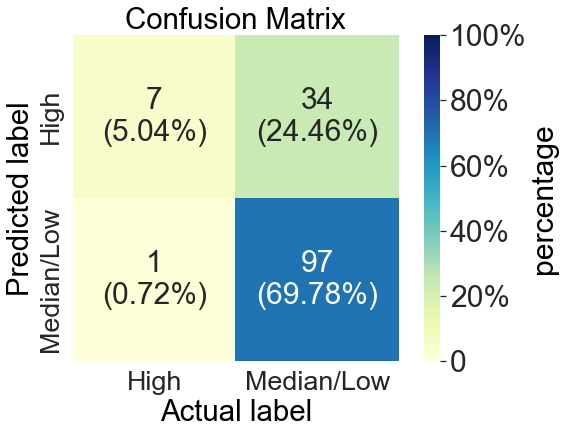

In [66]:
data = dataset[best_fold]
data = np.reshape(data,(2,2))

seaborn.set(color_codes=True)
seaborn.set(font_scale=2.45) # title and x, y axis, 2.1
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot()
ax.set_title("Confusion Matrix")

ax.title.set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

annot = [str(data.flatten()[i]) + "\n(" + str(round(data.flatten()[i]/data.sum()*100, 2))+"%)"  for i in range(4)]
annot = np.reshape(annot,(2,2))


#     ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'slide amount'}, fmt=fmt,

# heatmap with color bar
ax = seaborn.heatmap(data, annot=annot, annot_kws={"fontsize":30}, cmap="YlGnBu", square=True, 
#                      cbar_kws={'label': 'percentage'}, fmt="") 
# normalize to sum (258 for mondor)
                     cbar_kws={'label': 'percentage'}, fmt="", vmin=0, vmax=data.sum()) 
# use matplotlib.colorbar.Colorbar object
cbar = ax.collections[0].colorbar
# Replace the colorbar ticks with percentage
cbar.set_ticks([0, round(0.2*data.sum(), 2), round(0.4*data.sum(), 2), round(0.6*data.sum(), 2), 
                round(0.8*data.sum(), 2), 1*data.sum()])
# cbar.set_ticks([20, 40, 80, 100, 120, 160, 200])
cbar.set_ticklabels(['0', '20%', '40%', '60%', '80%', '100%'])
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=30) # color bar name, 27

# # highlight tp and tn without color bar
# cmap = ListedColormap(['#cdd6f2', 'w','w', '#cdd6f2']) ##eeeeee
# ax = seaborn.heatmap([[0,1],[2,3]], annot=annot, annot_kws={"fontsize":27}, cmap=cmap, square=True, 
#                      cbar_kws={'label': 'slide amount'}, fmt="", cbar=False, linewidths=1, linecolor='black')
# for axis in ['top','bottom','left','right']:
#     ax.spines[axis].set_visible(True)
#     ax.spines[axis].set_color('black')
#     ax.spines[axis].set_visible(True)
#     ax.spines[axis].set_color('black') 


ax.figure.axes[-1].yaxis.label.set_size(30) 
ax.figure.axes[-1].yaxis.label.set_color('black')

ax.set_xticklabels(labels)
ax.set_yticklabels(labels, va="center")

ax.set(ylabel="Predicted label", 
       xlabel="Actual label")

# if the heatmap is cut off...
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
plt.show()
# Optimal cutoff calculate on the test data themselves
# fig.savefig(os.path.join(path, 'confusion_matrix_'+str(best_fold)+'.png'), bbox_inches='tight')
# fig.savefig(os.path.join('/home/visiopharm5/Downloads/immune_figures/tcga_cm', 'confusion_matrix_'+str(best_fold)+'.png'), bbox_inches='tight')
# Optimal cutoff calculate on the tcga test set: for mondor
fig.savefig(os.path.join(path, 'confusion_matrix_'+str(best_fold)+'_tcga.png'), bbox_inches='tight')

### mean confusion matrix sample number 

139


[]

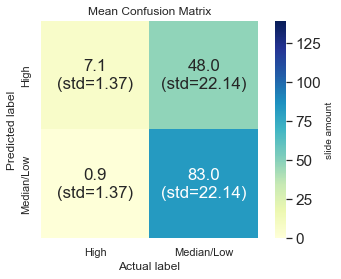

In [67]:
data_mean = np.mean(dataset, axis=0)
data_std = np.std(dataset, axis=0)

# data_mean_per = data_mean/data.sum()
# data_std_per = data_std/data.sum()

annotations = [str(round(data_mean[i],2)) + "\n(std=" + str(round(data_std[i],2))+")" for i in range(len(data_mean))]
# print(annotations)

data_mean = np.reshape(data_mean,(2,2))
annotations = np.reshape(annotations,(2,2))

seaborn.set(color_codes=True)
#    plt.figure(1, figsize=(9, 6))

plt.title("Mean Confusion Matrix")

seaborn.set(font_scale=1.4)
# ax = seaborn.heatmap(data_mean, annot=True, cmap="YlGnBu", cbar_kws={'label': 'slide amount'}, fmt=".2f")
ax = seaborn.heatmap(data_mean, annot=annotations, cmap="YlGnBu", cbar_kws={'label': 'slide amount'},
#                      square=True, fmt = '')
# normalize to sum
                     square=True, fmt = '', vmin = 0, vmax = data.sum())
print(data.sum())

ax.set_xticklabels(labels)
ax.set_yticklabels(labels, va="center")

ax.set(ylabel="Predicted label", 
       xlabel="Actual label")
ax.figure.axes[-1].yaxis.label.set_size(10)

# if the heatmap is cut off...
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


# Optimal cutoff calculate on the test data themselves
# plt.savefig(os.path.join(path, 'confusion_matrix_optimal_mean.png'), bbox_inches='tight', dpi=300)
# Optimal cutoff calculate on the tcga test set: for mondor
plt.savefig(os.path.join(path, 'confusion_matrix_optimal_mean_tcga.png'), bbox_inches='tight', dpi=300)
plt.plot()

### mean confusion matrix percentage

139


[]

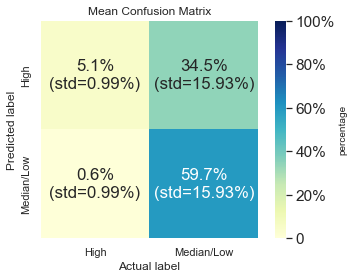

In [68]:
data_mean = data_mean/data.sum()
data_std = data_std/data.sum()

annotations = [str(np.round(data_mean*100, 1).flatten()[i]) + "%\n(std=" + str(np.round(data_std*100, 2).flatten()[i])+"%)" for i in range(4)]
# print(annotations)

annotations = np.reshape(annotations,(2,2))

seaborn.set(color_codes=True)
#    plt.figure(1, figsize=(9, 6))

plt.title("Mean Confusion Matrix")

seaborn.set(font_scale=1.4)
# ax = seaborn.heatmap(data_mean, annot=True, cmap="YlGnBu", cbar_kws={'label': 'slide amount'}, fmt=".2f")
ax = seaborn.heatmap(data_mean, annot=annotations, cmap="YlGnBu", cbar_kws={'label': 'percentage'}, 
#                      square=True, fmt = '')
# normalize to sum
                     square=True, fmt = '', vmin = 0, vmax = 1)
print(data.sum())

# use matplotlib.colorbar.Colorbar object
cbar = ax.collections[0].colorbar
# Replace the colorbar ticks with percentage
cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1])
# cbar.set_ticks([20, 40, 80, 100, 120, 160, 200])
cbar.set_ticklabels(['0', '20%', '40%', '60%', '80%', '100%'])

ax.figure.axes[-1].yaxis.label.set_size(10)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels, va="center")

ax.set(ylabel="Predicted label", 
       xlabel="Actual label")

# if the heatmap is cut off...
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Optimal cutoff calculate on the test data themselves
# plt.savefig(os.path.join(path, 'confusion_matrix_optimal_mean_per.png'), bbox_inches='tight', dpi=300)
# Optimal cutoff calculate on the tcga test set: for mondor
plt.savefig(os.path.join(path, 'confusion_matrix_optimal_mean_per_tcga.png'), bbox_inches='tight', dpi=300)
plt.plot()

### mean confusion matrix percentage: column normalization

In [ ]:
# data_std = np.reshape(data_std, (2,2))/data_mean.sum(axis=0)
# data_std = data_std.flatten()
# data_mean = data_mean/data_mean.sum(axis=0)

# annotations = [str(np.round(data_mean*100, 1).flatten()[i])
#                + "%\n(std=" + str(np.round(data_std*100, 2).flatten()[i])+"%)" for i in range(4)]
# # print(annotations)

# annotations = np.reshape(annotations,(2,2))

# seaborn.set(color_codes=True)
# #    plt.figure(1, figsize=(9, 6))

# plt.title("Mean Confusion Matrix")

# seaborn.set(font_scale=1.4)
# # ax = seaborn.heatmap(data_mean, annot=True, cmap="YlGnBu", cbar_kws={'label': 'slide amount'}, fmt=".2f")
# ax = seaborn.heatmap(data_mean, annot=annotations, cmap="YlGnBu", cbar_kws={'label': 'slide proportion %'}, 
#                      square=True, fmt = '', annot_kws={"fontsize":14})
# ax.figure.axes[-1].yaxis.label.set_size(10)
# ax.set_xticklabels(labels)
# ax.set_yticklabels(labels)

# ax.set(ylabel="Predicted label", 
#        xlabel="Actual label")

# # if the heatmap is cut off...
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

# # Optimal cutoff calculate on the test data themselves
# # plt.savefig(os.path.join(path, 'confusion_matrix_optimal_mean.png'), bbox_inches='tight', dpi=300)
# # Optimal cutoff calculate on the tcga test set: for mondor
# # plt.savefig(os.path.join(path, 'confusion_matrix_optimal_mean_per_tcga_colnor.png'), bbox_inches='tight', dpi=300)
# plt.plot()

In [93]:
# def plot_confusion_matrix(data, labels, fold, fmt="d"):
#     """Plot confusion matrix using heatmap.
 
#     Args:
#         data (list of list): List of lists with confusion matrix data.
#         labels (list): Labels which will be plotted across x and y axis.
#         output_filename (str): Path to output file.
 
#     """
#     seaborn.set(color_codes=True)
# #    plt.figure(1, figsize=(9, 6))
 
#     plt.title("Confusion Matrix fold " + str(fold))
 
#     seaborn.set(font_scale=1.4)
#     ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'}, fmt=fmt)
 
#     ax.set_xticklabels(labels)
#     ax.set_yticklabels(labels)
 
#     ax.set(ylabel="Predicted label", 
#            xlabel="Actual label")
 
# #    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
#     plt.plot()

In [402]:
# df = pd.read_csv(file)
# print(df.shape)
# display(df.head(10))

In [304]:
# data = []
# print(sum(df["Y"] == 1.0))
# print(sum(df["Y"] == 0.0))
# data.append(sum((df["Y"] == 1.0) & (df["Y_hat"] == 1.0)))
# data.append(sum((df["Y"] == 0.0) & (df["Y_hat"] == 1.0)))
# data.append(sum((df["Y"] == 1.0) & (df["Y_hat"] == 0.0)))
# data.append(sum((df["Y"] == 0.0) & (df["Y_hat"] == 0.0)))
# print(data)

# data = np.reshape(data,(2,2))

In [305]:
# # define labels
# labels = ["High", "Low + Median"]
 
# # create confusion matrix
# plot_confusion_matrix(data, labels, os.path.join(path, "confusion_matrix_full_vs_sangro_genes_km.png"))